There's a bug in PSFEx and I'm trying to deduce what it is.

In [3]:
output_dir = '/u/ki/swmclau2/des/TestOut/'

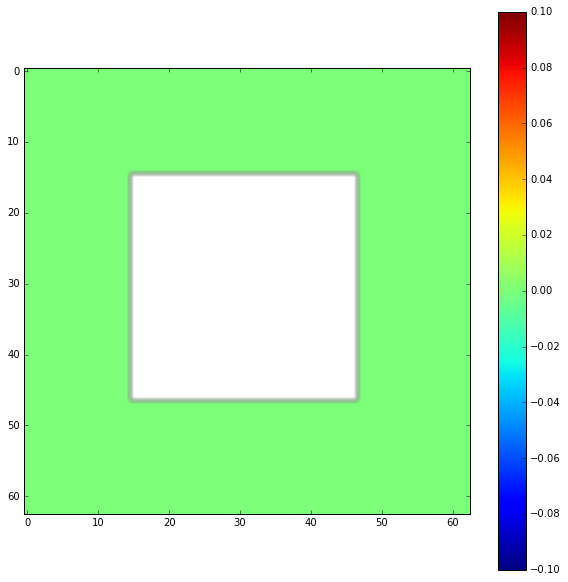

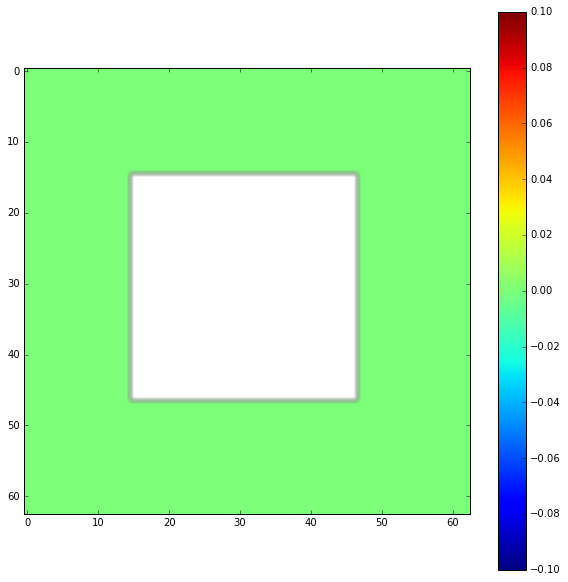

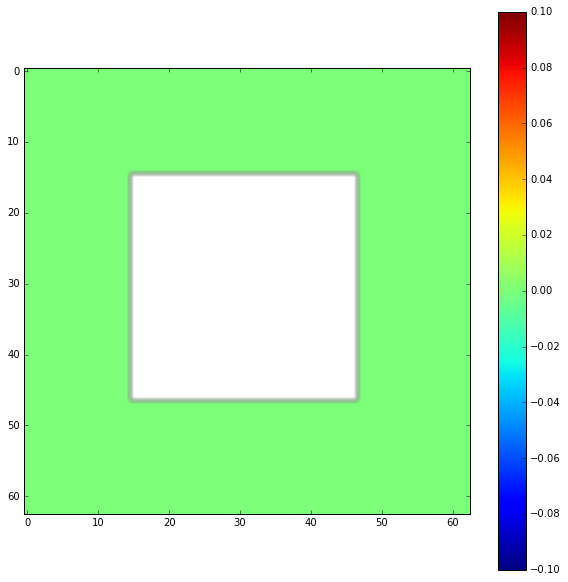

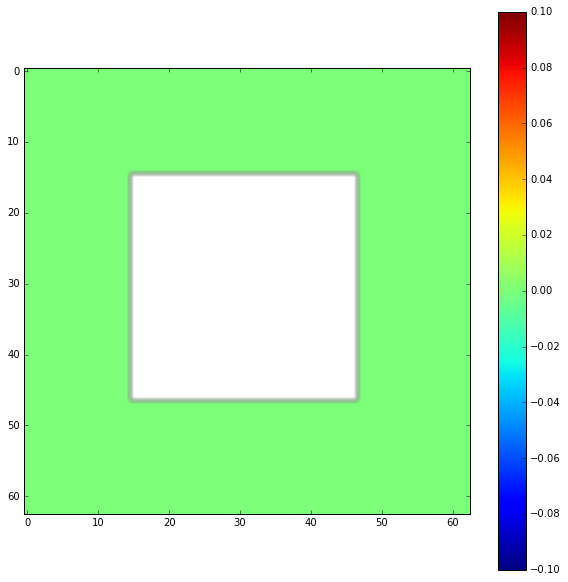

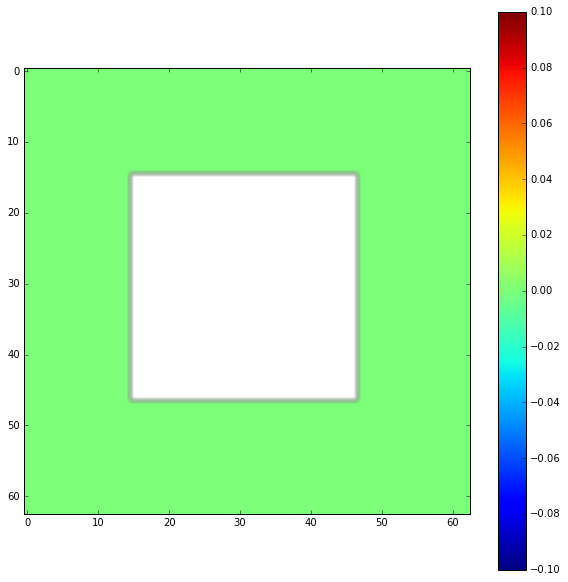

1.0


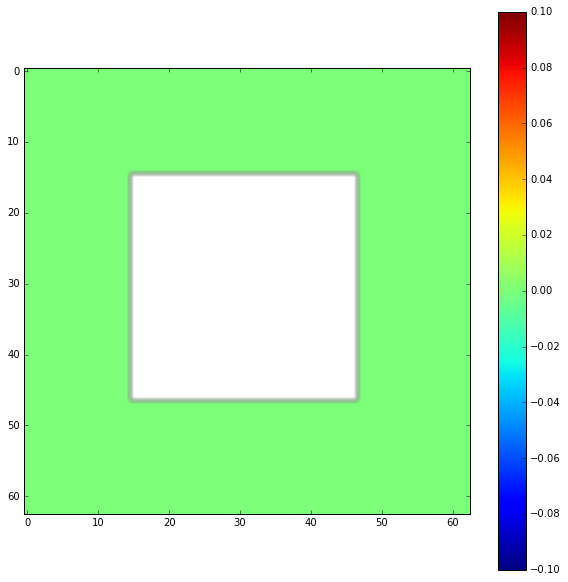

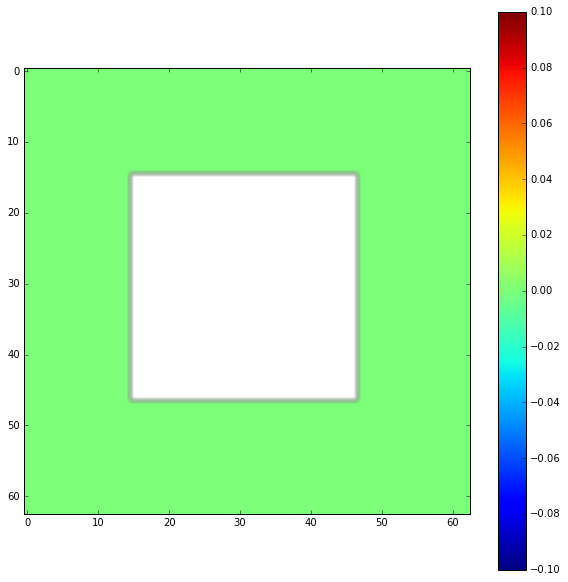

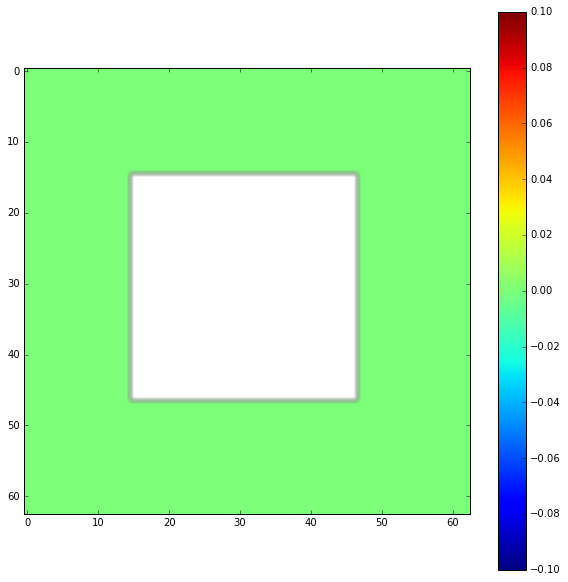

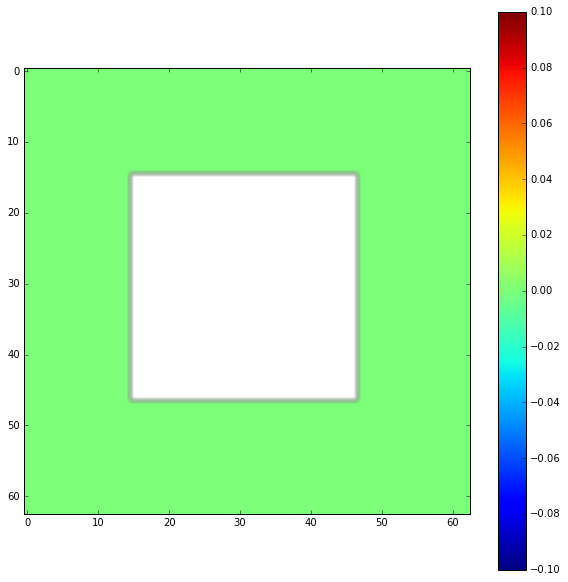

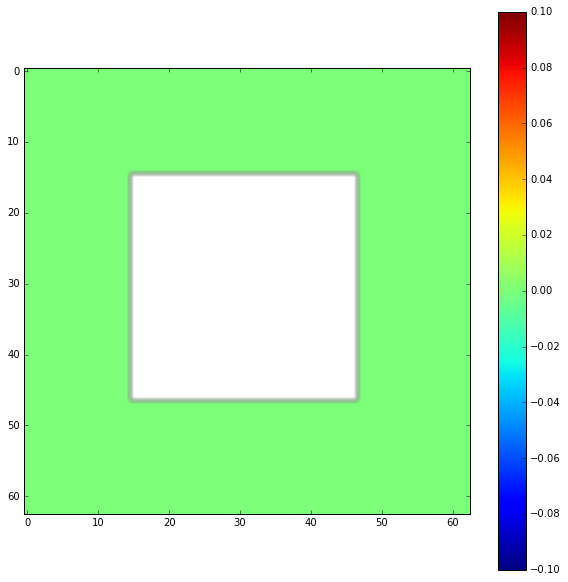

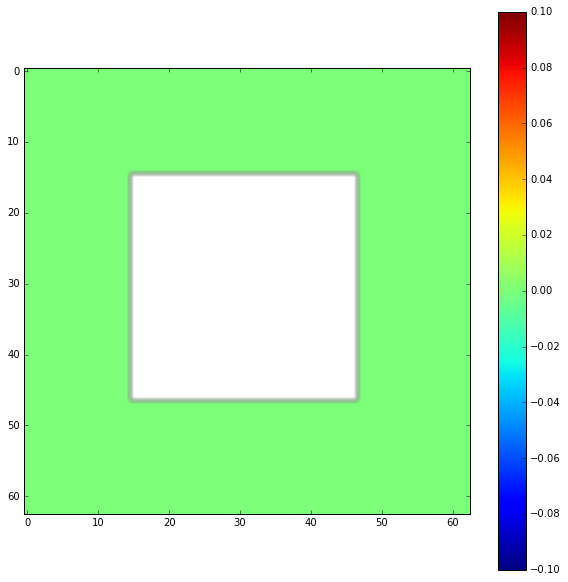

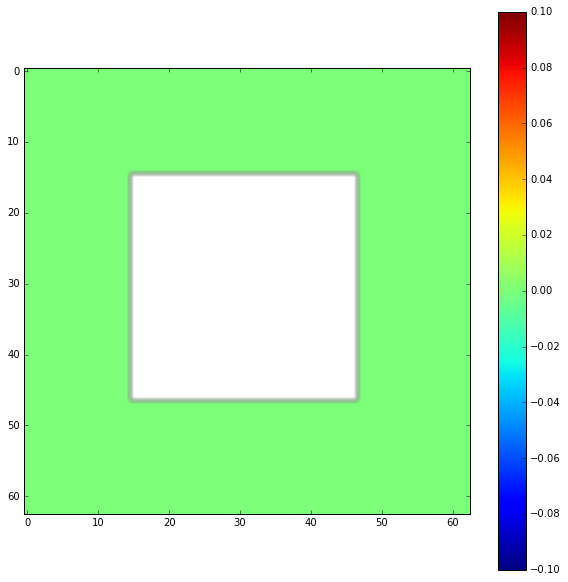

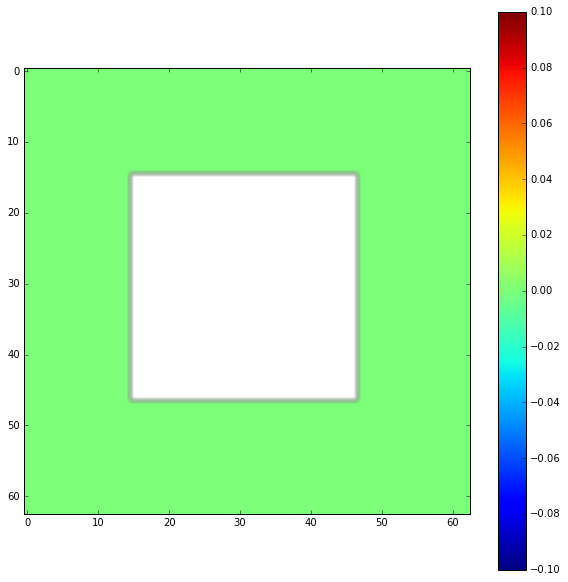

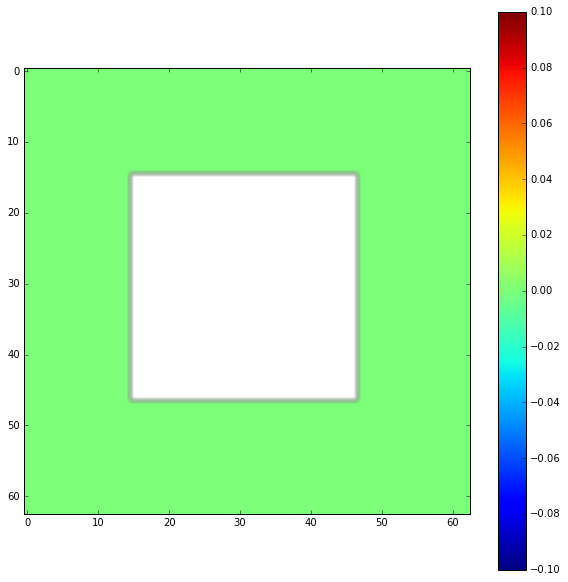

1.0


In [5]:
from glob import glob
from psfex import PSFEx
#import fitsio
from astropy.io import fits
import numpy as np
from itertools import izip

from matplotlib import pyplot as plt
%matplotlib inline

psf_files = sorted(glob(output_dir+'*.psf'))
atmpsf_list = []
for pfile in psf_files:
    name = pfile.split('/')[-1]
    name = name.split('.')[0]
    hdulist = fits.open(output_dir+name+'.fits')
    data = hdulist[2].data
    pex = PSFEx(pfile)
    bad_psfs = 0
    for yimage, ximage, vig in izip(data['Y_IMAGE'], data['X_IMAGE'], data['VIGNET']):
        atmpsf = np.zeros((32,32))
        #psfex has a tendency to return images of weird and varying sizes
        #This scheme ensures that they will all be the same 32x32 by zero padding
        #assumes the images are square and smaller than 32x32
        #Proof god is real and hates observational astronomers.

        atmpsf_loaded = pex.get_rec(yimage, ximage)
        
        if np.any(np.isnan(atmpsf_loaded)):
            #plt.imshow(atmpsf_loaded)
            #plt.show()
            #print 'Failed',
            bad_psfs+=1
            
        else:
            #print "Didn't fail",
            pass
        #print atmpsf_loaded.shape, yimage, ximage
        
        if np.any(np.isnan(vig)):
            fig = plt.figure(figsize = (10,10))
            im = plt.imshow(vig)
            plt.colorbar(im)
            plt.show()

        '''
        plt.subplot(121)
        plt.imshow(atmpsf_loaded)
        plt.subplot(122)
        plt.imshow(vig)
        plt.show()
        ''' 
        atm_shape = atmpsf_loaded.shape[0] #assumed to be square
        if atm_shape < atmpsf.shape[0]:
            pad_amount = int((atmpsf.shape[0]-atmpsf_loaded.shape[0])/2)
            pad_amount_upper = pad_amount + atmpsf_loaded.shape[0]

            atmpsf[pad_amount:pad_amount_upper,pad_amount:pad_amount_upper] = atmpsf_loaded
        elif atm_shape > atmpsf.shape[0]:
            # now we have to cut psf for... reasons
            # TODO: I am 95% certain we don't care if the psf is centered, but let us worry anyways
            center = int(atm_shape / 2)
            lower = center - int(atmpsf.shape[0] / 2)
            upper = lower + atmpsf.shape[0]
            atmpsf = atmpsf_loaded[lower:upper, lower:upper]
            
        atmpsf_list.append(atmpsf)
        
    print bad_psfs/float(len(data['X_IMAGE']))

atmpsf_list = np.array(atmpsf_list)

In [ ]:

plt.imshow(atmpsf_list[0])
plt.show()

In [ ]:
print np.nan is np.nan